# LIME vs SHAP
## for explaining classifiers in machine learning models

In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
data = pd.read_csv('data/train.csv')
print(data.shape)

(25000, 65)


In [32]:
data.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


Data to predict is "readmitted" (prediction target)

In [33]:
y = data.readmitted[0:2000]

base_features = [c for c in data.columns if c != "readmitted"]

x = data.iloc[0:2000, 0:60].astype(int)
x.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,acarbose_No,miglitol_No,troglitazone_No,tolazamide_No,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No
0,14,41,0,11,0,0,0,6,1,0,...,1,1,1,1,1,1,1,1,1,1
1,2,30,0,12,0,0,1,9,1,0,...,1,1,1,1,1,1,0,1,1,1
2,5,66,0,22,1,0,2,9,1,0,...,1,1,1,1,1,1,1,1,1,1
3,3,63,0,8,0,0,0,8,1,0,...,1,1,1,1,1,1,1,1,1,1
4,5,40,0,6,0,0,1,9,1,0,...,1,1,1,1,1,1,1,1,1,1


In [34]:
rnd = 23
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.25, stratify=y, random_state=rnd)

clss = RandomForestClassifier(max_depth=4, random_state=rnd).fit(train_x, train_y)


sample_num = 1
test_sample = val_x.iloc[sample_num, :]

## Feature importance - without LIME or SHAP

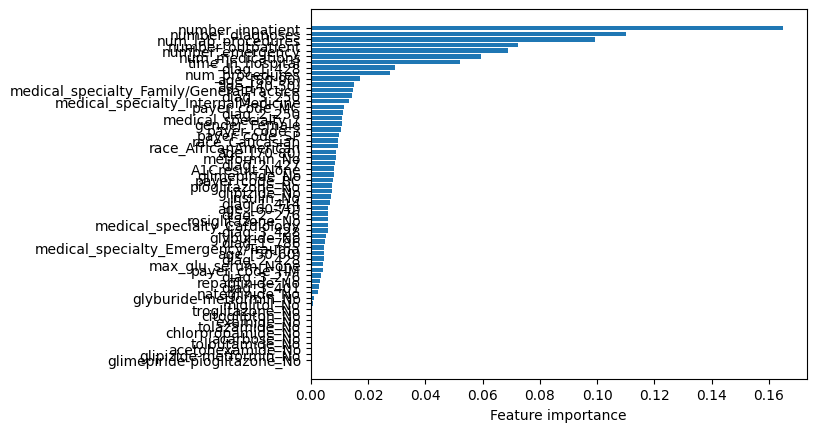

In [35]:
# feature importance df
imp_df = pd.DataFrame({'feature': train_x.columns.values, 'importance': clss.feature_importances_})

# reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1, len(imp_df.index) + 1)

# barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

# horizontal bars
plt.barh(y_pos, height)

# names on y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Feature importance")

plt.show()

## Outcome of test sample

Random forest prediction for smple 1 = [0.40326686 0.59673314]
Actual outcome =  1


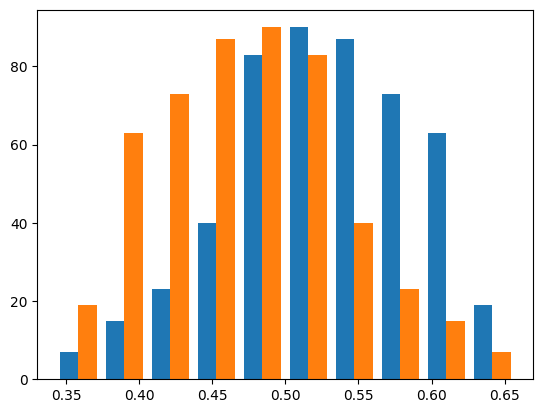

In [36]:
out = clss.predict_proba(val_x)
plt.hist(out)

print("Random forest prediction for smple", sample_num, '=', out[sample_num])
print("Actual outcome = ", val_y.iloc[sample_num])

## Visualization using LIME

In [38]:
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(training_data=train_x.values, feature_names=train_x.columns,
                                                   class_names=['No_Readmission', 'Yes_Readmission'], mode='classification', verbose=True, random_state=rnd)

lime_exp = lime_explainer.explain_instance(data_row=test_sample, predict_fn=clss.predict_proba, num_features=20)

Intercept 0.4492411207894519
Prediction_local [0.5648048]
Right: 0.596733136434143


/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


-> probability of 1 is ~0.56 (same as randomforestclassification)

In [ ]:
# plot
plt = lime_exp.as_pyplot_figure()
plt.tight_layout()